In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers


2023-09-13 15:37:16.267710: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-13 15:37:16.306501: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-13 15:37:16.307527: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-13 15:37:17.110484: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:


(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()



In [3]:
print('Total no of Images: ',X_train.shape[0]) 
print('Size of Image:', X_train.shape[1:])
print('Total no of labels:', y_train.shape)

Total no of Images:  60000
Size of Image: (28, 28)
Total no of labels: (60000,)


Label: 5


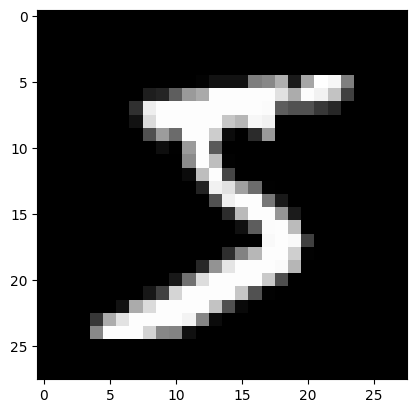

In [4]:


#look input data

plt.imshow(X_train[0], cmap = plt.get_cmap('gray'))  # cmap - convert image into grascale
print('Label:', y_train[0])



In [5]:
X_train = X_train.reshape((X_train.shape[0],-1))
X_test = X_test.reshape((X_test.shape[0], -1))

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

print(X_train.shape, X_test.shape)

(60000, 784) (10000, 784)


In [6]:
X_train = X_train/255
X_test = X_test/255

# print(X_train[0])
X_train.shape

(60000, 784)

In [7]:
# One-hot encoding

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print(y_train.shape)

(60000, 10)


In [8]:
num_classes = y_test.shape[1]
num_pixels = 784

In [9]:
# define baseline model

def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(256, input_dim=num_pixels, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    
    return model

In [10]:
# build the model
model = baseline_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 64)                16448     
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 218058 (851.79 KB)
Trainable params: 218058 (851.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [11]:
opt = SGD(learning_rate = 0.001)
model.compile(loss='categorical_crossentropy', optimizer= opt, metrics=['accuracy'])

In [12]:
model.fit(X_train, y_train, epochs=5, batch_size=32, verbose=1)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 1.7266 - accuracy: 0.5595
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.8641 - accuracy: 0.8164
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5807 - accuracy: 0.8572
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4762 - accuracy: 0.8761
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4216 - accuracy: 0.8869


In [13]:
scores = model.evaluate(X_test, y_test, verbose=1)
print("Error: %.2f%%" % (100-scores[1]*100))

313/313 [==============================] - 0s 1ms/step - loss: 0.3812 - accuracy: 0.8990
Error: 10.10%


In [14]:
img_width, img_height = 28, 28

[[[226 226 226]
  [225 225 225]
  [224 224 224]
  ...
  [226 226 226]
  [225 225 225]
  [226 226 226]]

 [[225 225 225]
  [225 225 225]
  [225 225 225]
  ...
  [225 225 225]
  [225 225 225]
  [225 225 225]]

 [[225 225 225]
  [225 225 225]
  [225 225 225]
  ...
  [225 225 225]
  [225 225 225]
  [228 228 228]]

 ...

 [[225 225 225]
  [225 225 225]
  [225 225 225]
  ...
  [225 225 225]
  [225 225 225]
  [226 226 226]]

 [[224 224 224]
  [225 225 225]
  [225 225 225]
  ...
  [225 225 225]
  [225 225 225]
  [224 224 224]]

 [[226 226 226]
  [225 225 225]
  [225 225 225]
  ...
  [227 227 227]
  [225 225 225]
  [226 226 226]]]


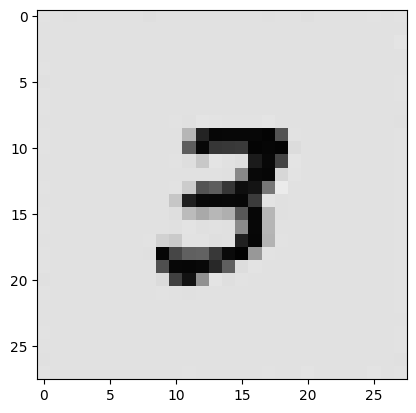

In [15]:
ii = cv2.imread("/home/anssia/Git/aivuln/mnist/input/mnistpredict/3.png")
gray_image = cv2.cvtColor(ii, cv2.COLOR_BGR2GRAY)
gray_image = cv2.resize(ii, (28,28), interpolation=cv2.INTER_LINEAR)
gray_image = cv2.bitwise_not(gray_image)
print(gray_image)
plt.imshow(gray_image,cmap='Greys')
plt.show()
# gray_image.shape
x = np.expand_dims(gray_image, axis=0)
#x = x.reshape((1, -1))

In [16]:
#preds = model.predict_classes(x)
#prob = model.predict_proba(x)

predict_x=model.predict(x) 
classes_x=np.argmax(predict_x,axis=1)

print('Predicted value is ',predict_x[0])
print('Probability across all numbers :', classes_x[0])

ValueError: in user code:

    File "/home/anssia/Git/aivuln/env/lib/python3.11/site-packages/keras/src/engine/training.py", line 2341, in predict_function  *
        return step_function(self, iterator)
    File "/home/anssia/Git/aivuln/env/lib/python3.11/site-packages/keras/src/engine/training.py", line 2327, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/anssia/Git/aivuln/env/lib/python3.11/site-packages/keras/src/engine/training.py", line 2315, in run_step  **
        outputs = model.predict_step(data)
    File "/home/anssia/Git/aivuln/env/lib/python3.11/site-packages/keras/src/engine/training.py", line 2283, in predict_step
        return self(x, training=False)
    File "/home/anssia/Git/aivuln/env/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/home/anssia/Git/aivuln/env/lib/python3.11/site-packages/keras/src/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential" is incompatible with the layer: expected shape=(None, 784), found shape=(None, 28, 28, 3)
